In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t

In [2]:
# z_score for sampling distributions
def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [3]:
# t_score for sampling distributions
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std/ sample_size**0.5
    return numerator / denomenator

# Understanding the Hypothesis Testing

Step - 1:  
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq $  
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3:
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

# Known Variance of Population

<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? (Given that the population std is 50) </b>


Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \ Average\ weight\ of\ each\ biriyani\ packet\ \ne 500 $$
Null Hypothesis (Status Quo): $$ H_0: \ Average\ weight\ of\ each\ biriyani\ packet\ = 500 $$

Step - 2:  
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} \ = \ 465.3 $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: Two tailed z-test: $$ reject \ H_0 \ if\ -1.95996 \lt \ z\ score\ \gt 1.95996 $$

Step - 5.2: Compute p-value
$$ if (p \ value < 0.05) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [4]:
# sample of size 10
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
# mean of sample
sum(l)/len(l)

465.3

In [5]:
# Two Tail - Calculating the z-critical value
confidence_level = 0.95

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha/2) # Two tailed Z score for 95% Confidence Level

print(z_critical)

1.959963984540054


In [6]:
# Defining the sample and population parameters
sample_size = 10
sample_mean = 465.3
pop_mean = 500
pop_std = 50

In [7]:
# Calculating the z-score
z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

-2.1946206961568544


Text(465.3, 0.0007, 'x_bar')

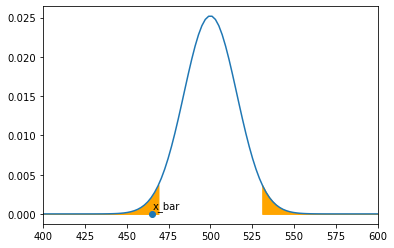

In [8]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
z_critical_left = pop_mean + (-z_critical * std)
z_critical_right = pop_mean + (z_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(z_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [9]:
# Conclusion using z test

if(np.abs(z) > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [10]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(z)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.028190817687629988
Reject Null Hypothesis


<b>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? (Given that the population std is 0.5)</b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ Average\ rating \gt 4 $$
Null Hypothesis (Status Quo): $$ H_0: \ Average\ rating \le 4 $$

Step - 2:  
* Collect a sample of size n = 20 $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
* Compute sample mean $$ \bar{x} \ = \ 4.25 $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: right tailed z-test: $$ reject \ H_0 \ if\ Z\ score \gt 1.6448536$$

Step - 5.2: Compute p-value
$$ if (p \ value < 0.05) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$


In [11]:
# One Tail - Calculating the z-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha)

print(z_critical)

1.6448536269514722


In [12]:
#sample of size 20
l=[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
# sample mean
sum(l)/len(l)

4.25

In [13]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 4.25
pop_mean = 4
pop_std = 0.5

In [14]:
# Calculating the z-score

z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

2.23606797749979


Text(4.25, 0.1, 'x_bar')

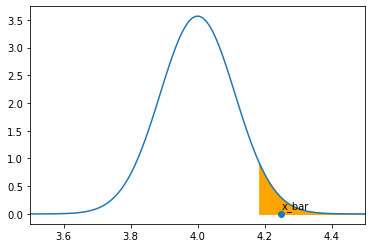

In [15]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
z_critical_right = pop_mean + (z_critical * std)


# Shading the right rejection region
x1 = np.linspace(z_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [16]:
# Conclusion using z test

if(z > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [17]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(z))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0126736593387341
Reject Null Hypothesis


<b>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? (Given that the population std is 1)</b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ Average\ mileage \gt 15 km/litre  $$
Null Hypothesis (Status Quo): $$ H_0: \ Average\ mileage \le 15 km/litre $$

Step - 2:  
* Collect a sample of size n = 20 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean $$ \bar{x} \ = \ 15.1 $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: right tailed z-test: $$ reject \ H_0 \ if \ z\ score \gt 1.64485362$$

Step - 5.2: Compute p-value
$$ if (p \ value < 0.05) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [18]:
# sample of size 20
l=[14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
# sample mean
sum(l)/len(l)

15.098999999999998

In [19]:
# One Tail

confidence_level = 0.95

alpha = 1 - confidence_level

z_critical = norm.ppf(1 - alpha)

print(z_critical)

1.6448536269514722


In [20]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15
pop_std = 1

In [21]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

0.4472135954999564


Text(15.1, 0.1, 'x_bar')

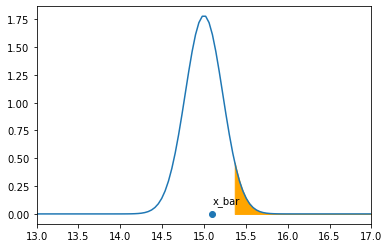

In [22]:
x_min = 13
x_max = 17

mean = pop_mean
std = pop_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

z_critical_right = pop_mean + (z_critical * std)

x1 = np.linspace(z_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the acceptance region
# i.e. Fail to Reject the Null Hypothesis

In [23]:
if(z > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [24]:
p_value = 1.0 - norm.cdf(np.abs(z))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.32736042300928914
Fail to reject Null Hypothesis


<b>Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? (Based on past data you know that the std is 10 ms)</b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ Average\ time\ taken \lt\ 100ms $$
Null Hypothesis (Status Quo): $$ H_0: \ Average\ time\ taken \ge\ 100ms $$

Step - 2:  
* Collect a sample of size n = 100
* Compute sample mean $$ \bar{x} \ = \ 97.5 $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: left tailed z-test: $$ reject \ H_0 \ if \ z\ score \lt 2.326347874 $$

Step - 5.2: Compute p-value
$$ if (p \ value < 0.01) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [25]:
# One Tail

alpha = 1 - 0.99

z_critical = norm.ppf(1 - alpha)

print(z_critical)

2.3263478740408408


In [26]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100
pop_std = 10

In [27]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)

print(z)

-2.5


Text(97.5, 0.02, 'x_bar')

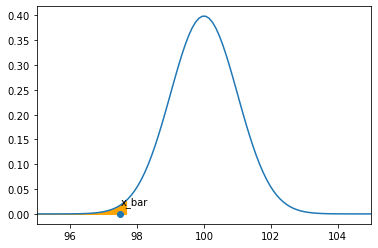

In [28]:
x_min = 95
x_max = 105

mean = pop_mean
std = pop_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

z_critical_left = pop_mean + (-z_critical * std)

x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis

In [29]:
if(z < -z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [30]:
p_value = 1.0 - norm.cdf(np.abs(z))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.006209665325776159
Reject Null Hypothesis


# Unknown Variance of Population

<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? ~(Given that the population std is 50)~ </b>

<b>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? ~(Given that the population std is 0.5)~ </b>

<b>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? ~(Given that the population std is 1)~ </b>

<b>Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? ~(Based on past data you know that the std is 10 ms)~ </b>



# solutions

<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? ~(Given that the population std is 50)~ </b>

Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \ Average\ weight\ of\ each\ biriyani\ packet\ \ne 500 $$
Null Hypothesis (Status Quo): $$ H_0: \ Average\ weight\ of\ each\ biriyani\ packet\ = 500 $$

Step - 2:  
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} \ = \ 465.3 $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: Two tailed t-test: $$ reject \ H_0 \ if\ -2.2621 \lt \ t\ score\ \gt 2.2621 $$

Step - 5.2: Compute p-value
$$ if (p \ value < 0.05) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [31]:
# sample of size 10
l=[490,220,470,500,495,496,496,498,508,480]
# mean of sample
sum(l)/len(l)

465.3

In [32]:
sample_size=10
sample_mean=465.3
population_mean=500
sample_std=np.std(np.array(l))
print("sample standard deviation S =",sample_std,sep=" ")

sample standard deviation S = 82.3918078451978


In [33]:
# Two tail - calculating t critical value

alpha = 1 - 0.95
t_critical = t.ppf(1-alpha/2, df = 9)
print(t_critical)

2.2621571627409915


In [34]:
# calculating t-score
t_stat=t_score(sample_size,sample_mean=sample_mean,pop_mean=population_mean,sample_std=sample_std)
print("t score =",t_stat,sep=" ")

t score = -1.3318197242863192


Text(465.3, 0.0007, 'x_bar')

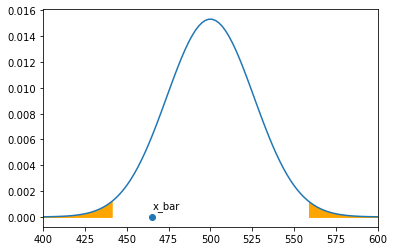

In [35]:
x_min = 400
x_max = 600

mean = population_mean
std = sample_std/(sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


t_critical_left = population_mean + (-t_critical * std)
t_critical_right = population_mean + (t_critical * std)


x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [36]:
# Conclusion using t test
if(np.abs(t_stat) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [37]:
p_value = 1.0 - norm.cdf(np.abs(t_stat))

print("p_value = ", p_value)

if(p_value < 0.05):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.09145971743176973
Fail to reject Null Hypothesis


<b>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? ~(Given that the population std is 0.5)~ </b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ Average\ rating \gt 4 $$
Null Hypothesis (Status Quo): $$ H_0: \ Average\ rating \le 4 $$

Step - 2:  
* Collect a sample of size n = 10 $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
* Compute sample mean $$ \bar{x} \ = \ 4.25 $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: right tailed t-test: $$ reject \ H_0 \ if\ t\ score \gt 1.3484$$

Step - 5.2: Compute p-value
$$ if (p \ value < 0.05) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [38]:
# sample of size 20
l=[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
# mean of sample
sum(l)/len(l)

4.25

In [39]:
sample_size=20
sample_mean=4.25
sample_std=np.std(np.array(l))
population_mean=4
print("sample standard deviation S =",sample_std,sep=" ")

sample standard deviation S = 0.82915619758885


In [40]:
# One tail t-test calculating t critical value

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [41]:
# calculating t-score
t_stat=t_score(sample_size,sample_mean,population_mean,sample_std)
print("t score =",t_stat,sep=" ")

t score = 1.3483997249264843


Text(4.25, 0.1, 'x_bar')

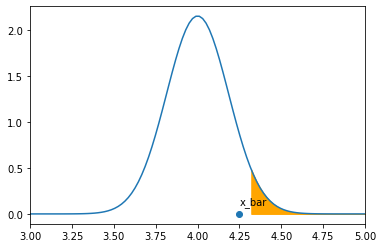

In [42]:
x_min = 3
x_max = 5

mean = population_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_right = population_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [43]:
# Conclusion using t test

if(abs(t_stat) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [44]:
p_value = 1.0 - norm.cdf(np.abs(t_stat))

print("p_value = ", p_value)

if(p_value < 0.05):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.08876492620607679
Fail to reject Null Hypothesis


<b>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? ~(Given that the population std is 1)~ </b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ Average\ mileage \gt 15 km/litre  $$
Null Hypothesis (Status Quo): $$ H_0: \ Average\ mileage \le 15 km/litre $$

Step - 2:  
* Collect a sample of size n = 10 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean $$ \bar{x} \ = \ 15.1 $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: right tailed t-test: $$ reject \ H_0 \ if \ t\ score \gt 1.7291$$

Step - 5.2: Compute p-value
$$ if (p \ value < 0.05) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [45]:
l=[14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
#sample mean
sum(l)/len(l)

15.098999999999998

In [46]:
sample_size=20
sample_mean=15.098999999999998
population_mean=15.1
sample_std=np.std(np.array(l))
print("sample standard deviation =",sample_std,sep=" ")

sample standard deviation = 0.9994043225842081


In [47]:
# One tail t-test calculating t critical value

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [48]:
# calculating t-score
t_stat=t_score(sample_size,sample_mean,population_mean,sample_std)
print("t score =",t_stat,sep=" ")

t score = -0.004474801493194693


Text(15.098999999999998, 0.1, 'x_bar')

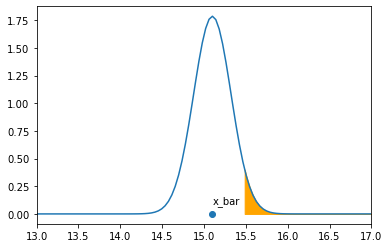

In [49]:
x_min = 13
x_max = 17

mean = population_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_right = population_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [50]:
# Conclusion using t test
if(abs(t_stat) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [51]:
p_value = 1.0 - norm.cdf(np.abs(t_stat))

print("p_value = ", p_value)

if(p_value < 0.05):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.49821481844566395
Fail to reject Null Hypothesis


<b>Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? ~(Based on past data you know that the std is 10 ms)~(sample standard deviation=7) </b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ Average\ time\ taken \lt\ 100ms $$
Null Hypothesis (Status Quo): $$ H_0: \ Average\ time\ taken \ge\ 100ms $$

Step - 2:  
* Collect a sample of size n = 100
* Compute sample mean $$ \bar{x} \ = \ 97.5 $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $

Step - 5.1: left tailed t-test: $$ reject \ H_0 \ if \ t\ score \lt -1.7291 $$

Step - 5.2: Compute p-value
$$ if (p \ value < 0.01) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [52]:
sample_size=100
sample_mean=97.5
sample_std=7
population_mean=100

In [53]:
# One tail t-test calculating t critical value
alpha = 1 - 0.95
t_critical = t.ppf(1-alpha, df = 19)
print(t_critical)

1.729132811521367


In [54]:
# calculating t-score
t_stat=t_score(sample_size,sample_mean,population_mean,sample_std)
print("t score =",t_stat,sep=" ")

t score = -3.5714285714285716


Text(97.5, 0.02, 'x_bar')

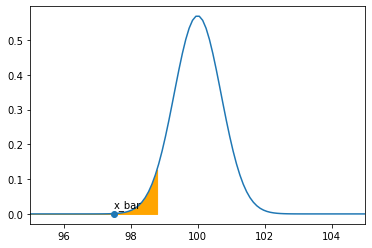

In [55]:
x_min = 95
x_max = 105

mean = population_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)

plt.plot(x, y)

t_critical_left = population_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

In [56]:
# Conclusion using t test

if(abs(t_stat) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [57]:
p_value = 1.0 - norm.cdf(np.abs(t_stat))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.00017751969037349546
Reject Null Hypothesis
